In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pyodbc

In [2]:
data_diabete = pd.read_csv("diabetes_prediction_dataset.csv")
data_diabete.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
data_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data_duplique = data_diabete[data_diabete.duplicated]
data_duplique.shape

(3854, 9)

In [5]:
data_diabete.drop_duplicates(ignore_index = True, inplace = True)

In [6]:
data_diabete.shape

(96146, 9)

In [7]:
for column in data_diabete.columns:
    unique_val = len(data_diabete[column].unique())
    print(f"{column}: {unique_val} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [8]:
data_diabete.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Exploratory Data Analysis

In [10]:
data_diabete[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'] ].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


## variable: "gender"

In [11]:
data_diabete['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [12]:
i_index = (data_diabete[data_diabete.gender == 'Other']).index
data_diabete.drop(i_index, inplace=True)

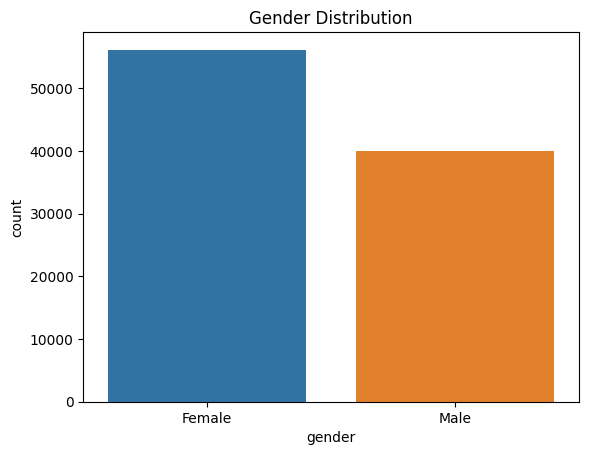

In [13]:
sns.countplot(x='gender', data=data_diabete)
plt.title('Gender Distribution')
plt.show()

## variable: "age"

In [14]:
max_age = data_diabete['age'].max()
min_age = data_diabete['age'].min()
moy_age = data_diabete['age'].mean()
print("maximum d'age est:", int(max_age))
print("minimum d'age est:", int(min_age))
print("la moyenne d'age est:", int(moy_age))

maximum d'age est: 80
minimum d'age est: 0
la moyenne d'age est: 41


In [15]:
data_diabete.shape

(96128, 9)

<Axes: >

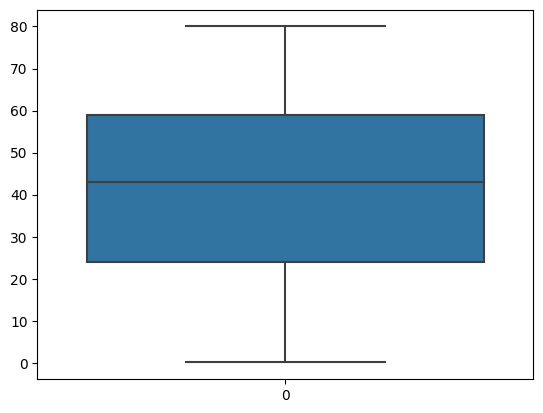

In [16]:
sns.boxplot(data_diabete["age"])

In [17]:
data_diabete[data_diabete['age']<1].value_counts().sum()

910

In [18]:
j_index = (data_diabete[data_diabete['age']<1]).index
data_diabete.drop(j_index,inplace=True)

In [19]:
data_diabete.shape

(95218, 9)

In [20]:
print("minimum d'age est:", int(data_diabete['age'].min())) 

minimum d'age est: 1


## Variable: "hypertension"

In [21]:
data_diabete['hypertension'].value_counts()

hypertension
0    87757
1     7461
Name: count, dtype: int64

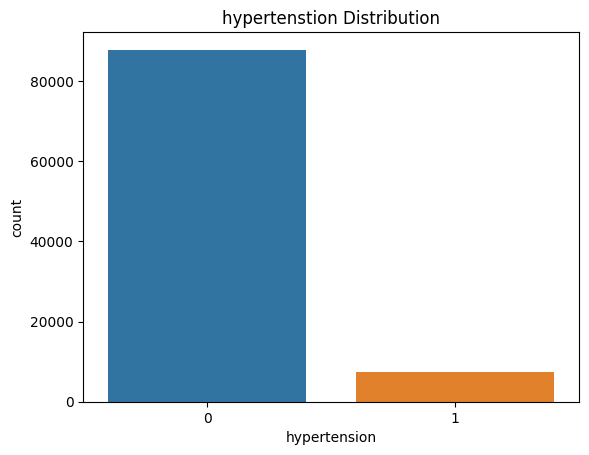

In [22]:
sns.countplot(x='hypertension', data=data_diabete)
plt.title('hypertenstion Distribution')
plt.show()

## Variable: "heart_disease"

In [23]:
data_diabete['heart_disease'].value_counts()

heart_disease
0    91295
1     3923
Name: count, dtype: int64

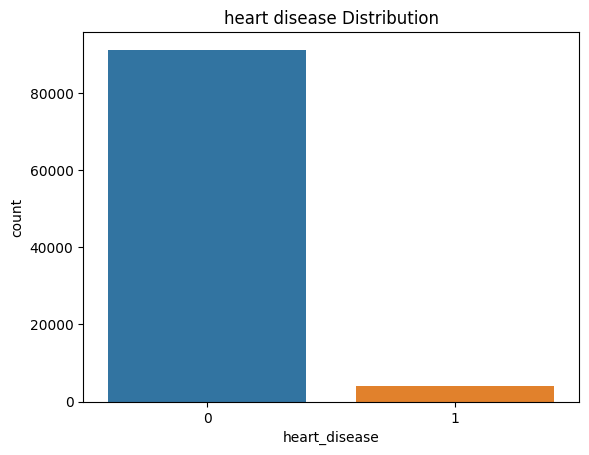

In [24]:
sns.countplot(x='heart_disease', data=data_diabete)
plt.title('heart disease Distribution')
plt.show()

## Variable: "bmi"

In [25]:
data_diabete['bmi'].describe()

count    95218.000000
mean        27.417477
std          6.717427
min         10.010000
25%         23.550000
50%         27.320000
75%         29.930000
max         95.690000
Name: bmi, dtype: float64

<Axes: >

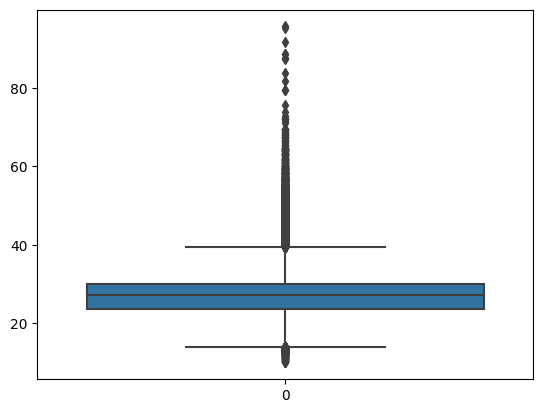

In [26]:
sns.boxplot(data_diabete["bmi"])

In [27]:
Q1 = 23.56
Q3 = 29.93

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

index_upper = (data_diabete[data_diabete["bmi"]>=upper]).index
index_lower = (data_diabete[data_diabete["bmi"]<=lower]).index

data_diabete.drop(index_upper, inplace=True)
data_diabete.drop(index_lower, inplace=True)

data_diabete.shape

(89788, 9)

<Axes: >

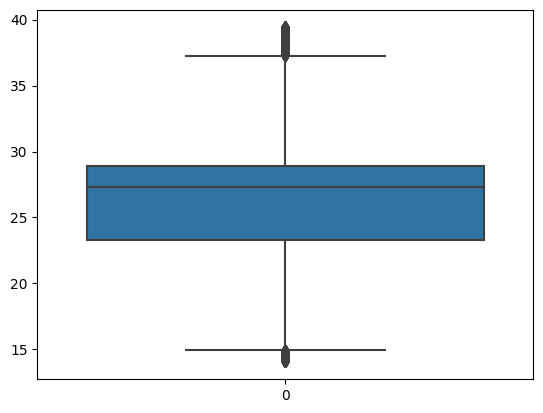

In [28]:
sns.boxplot(data_diabete["bmi"])

In [29]:
data_diabete["bmi"].describe()

count    89788.000000
mean        26.493528
std          5.156403
min         14.010000
25%         23.320000
50%         27.320000
75%         28.900000
max         39.480000
Name: bmi, dtype: float64

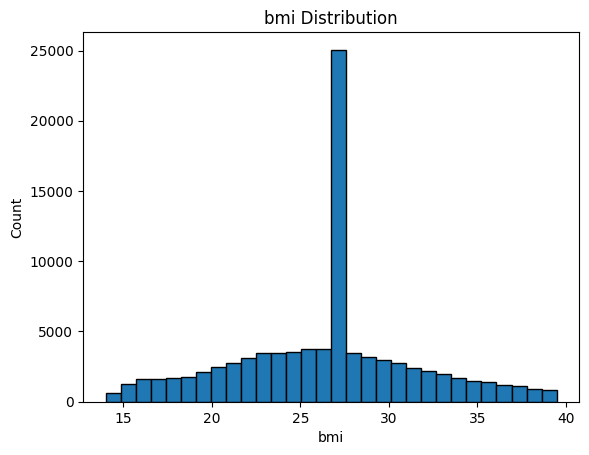

In [30]:
plt.hist(data_diabete['bmi'], bins=30, edgecolor='black')
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

## variable: "HbA1c_level"

In [31]:
data_diabete['HbA1c_level'].describe()

count    89788.000000
mean         5.521359
std          1.066324
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

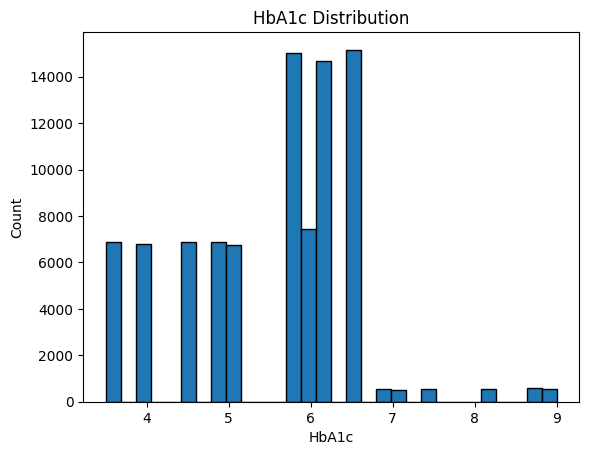

In [32]:
plt.hist(data_diabete['HbA1c_level'], bins=30, edgecolor='black')
plt.title('HbA1c Distribution')
plt.xlabel('HbA1c')
plt.ylabel('Count')
plt.show()

## variable:"blood glucose level"

In [33]:
data_diabete['blood_glucose_level'].describe()

count    89788.000000
mean       137.736635
std         40.388225
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

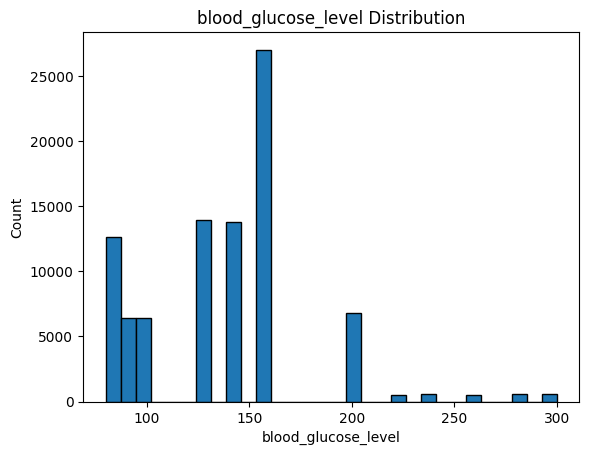

In [34]:
plt.hist(data_diabete['blood_glucose_level'], bins=30, edgecolor='black')
plt.title('blood_glucose_level Distribution')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count')
plt.show()

## varibale:"diabetes"

In [35]:
data_diabete["diabetes"].value_counts()

diabetes
0    82591
1     7197
Name: count, dtype: int64

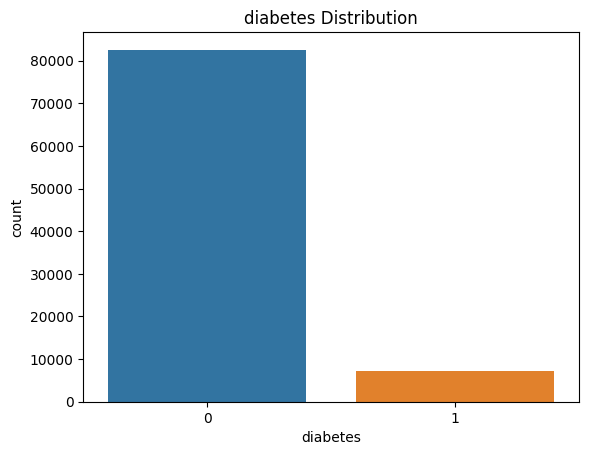

In [36]:
sns.countplot(x='diabetes', data=data_diabete)
plt.title('diabetes Distribution')
plt.show()

## Varibale: "smoking history"

In [37]:
data_diabete['smoking_history'].value_counts()

smoking_history
never          32150
No Info        30709
current         8658
former          8578
not current     5970
ever            3723
Name: count, dtype: int64

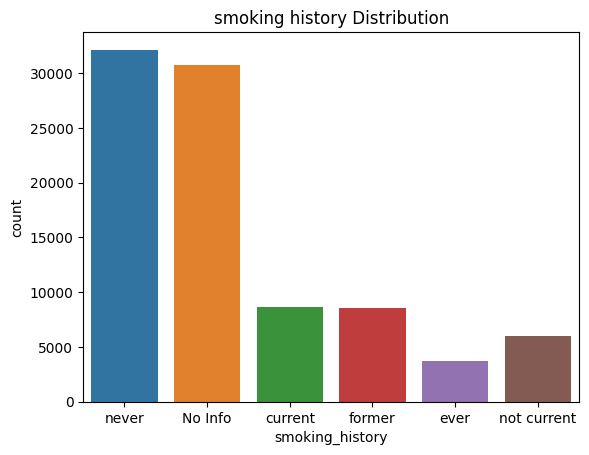

In [38]:
sns.countplot(x='smoking_history', data=data_diabete)
plt.title('smoking history Distribution')
plt.show()

In [39]:
data_diabete["smoking_history"].replace("No Info", None, inplace=True)

In [40]:
data_diabete['smoking_history'].value_counts()

smoking_history
never          32150
current         8658
former          8578
not current     5970
ever            3723
Name: count, dtype: int64

In [41]:
data_diabete['smoking_history'].isnull().sum()

30709

In [42]:
data_diabete.isna().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        30709
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In [43]:
data = data_diabete.copy(deep=True)
data.shape

(89788, 9)

In [44]:
catego_var = data[['gender', 'smoking_history']]
cat_dummies = pd.get_dummies(catego_var, drop_first=False)
cat_dummies.head()

,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,True,False,False,False,False,True,False
1,True,False,False,False,False,False,False
2,False,True,False,False,False,True,False
3,True,False,True,False,False,False,False
4,False,True,True,False,False,False,False


In [45]:
data = data.drop(['gender', 'smoking_history'], axis=1)
data = pd.concat([data, cat_dummies],axis=1)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,True,False,False,False,False


In [46]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.438948,0.563636,0.272727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.670886,0.0,0.0,0.522576,0.563636,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.341772,0.0,0.0,0.522576,0.400000,0.354545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.443038,0.0,0.0,0.370632,0.272727,0.340909,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949367,1.0,1.0,0.240675,0.236364,0.340909,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [47]:
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [48]:
data.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [49]:
data.shape

(89788, 14)

In [50]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [51]:
dt = data[[ 'smoking_history_current','smoking_history_ever', 'smoking_history_former','smoking_history_never', 'smoking_history_not current']]

In [52]:
dt.idxmax(axis=1)

0          smoking_history_never
1        smoking_history_current
2          smoking_history_never
3        smoking_history_current
4        smoking_history_current
                  ...           
89783    smoking_history_current
89784    smoking_history_current
89785     smoking_history_former
89786      smoking_history_never
89787    smoking_history_current
Length: 89788, dtype: object

In [53]:
data['smoker'] = dt.idxmax(axis=1)

In [54]:
data.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,smoker
0,1.000000,0.0,1.0,0.438948,0.563636,0.272727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never
1,0.670886,0.0,0.0,0.522576,0.563636,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,smoking_history_current
2,0.341772,0.0,0.0,0.522576,0.400000,0.354545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never
3,0.443038,0.0,0.0,0.370632,0.272727,0.340909,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,smoking_history_current
4,0.949367,1.0,1.0,0.240675,0.236364,0.340909,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,smoking_history_current
5,0.240506,0.0,0.0,0.522576,0.563636,0.022727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never
6,0.544304,0.0,0.0,0.208088,0.545455,0.545455,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never
7,0.987342,0.0,0.0,0.386729,0.400000,0.022727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,smoking_history_current
8,0.518987,0.0,0.0,0.770711,0.236364,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never
9,0.392405,0.0,0.0,0.522576,0.272727,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never


In [55]:
df=data[['gender_Female', 'gender_Male']]
data['gender'] = df.idxmax(axis=1)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,smoker,gender
0,1.000000,0.0,1.0,0.438948,0.563636,0.272727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never,gender_Female
1,0.670886,0.0,0.0,0.522576,0.563636,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,smoking_history_current,gender_Female
2,0.341772,0.0,0.0,0.522576,0.400000,0.354545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,smoking_history_never,gender_Male
3,0.443038,0.0,0.0,0.370632,0.272727,0.340909,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,smoking_history_current,gender_Female
4,0.949367,1.0,1.0,0.240675,0.236364,0.340909,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,smoking_history_current,gender_Male


In [56]:
data['gender'].replace('gender_Female', 'Female', inplace=True)
data['gender'].replace('gender_Male', 'Male', inplace=True)
data['smoker'].replace('smoking_history_ever', 'ever', inplace=True)
data['smoker'].replace('smoking_history_former', 'former', inplace=True)
data['smoker'].replace('smoking_history_never', 'never', inplace=True)
data['smoker'].replace('smoking_history_not current', 'not current', inplace=True)
data['smoker'].replace('smoking_history_current', 'current', inplace=True)

In [57]:
data.drop(['smoking_history_current','smoking_history_ever', 'smoking_history_former','smoking_history_never', 'smoking_history_not current'], axis=1, inplace=True)

In [58]:
data.drop(['gender_Female', 'gender_Male'], axis=1, inplace=True)
data.tail()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoker,gender
89783,0.443038,0.0,0.0,0.415783,0.236364,0.295455,0.0,current,Female
89784,0.012658,0.0,0.0,0.131920,0.545455,0.090909,0.0,current,Female
89785,0.822785,0.0,0.0,0.542599,0.400000,0.340909,0.0,former,Male
89786,0.291139,0.0,0.0,0.840597,0.090909,0.090909,0.0,never,Female
89787,0.708861,0.0,0.0,0.330585,0.563636,0.045455,0.0,current,Female


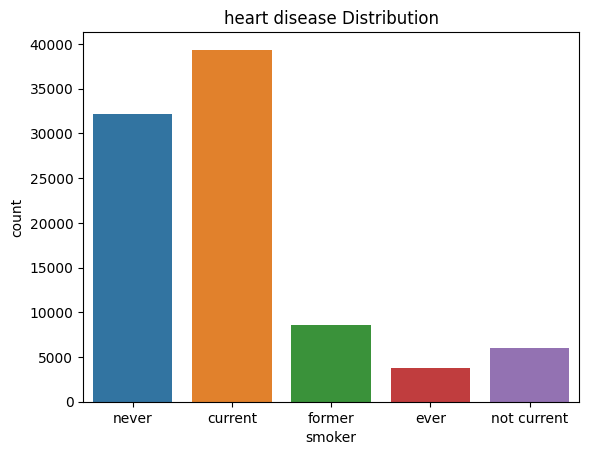

In [59]:
sns.countplot(x='smoker', data=data)
plt.title('heart disease Distribution')
plt.show()

In [60]:
data["smoker"].value_counts().sum()

89788

## diabete vs age

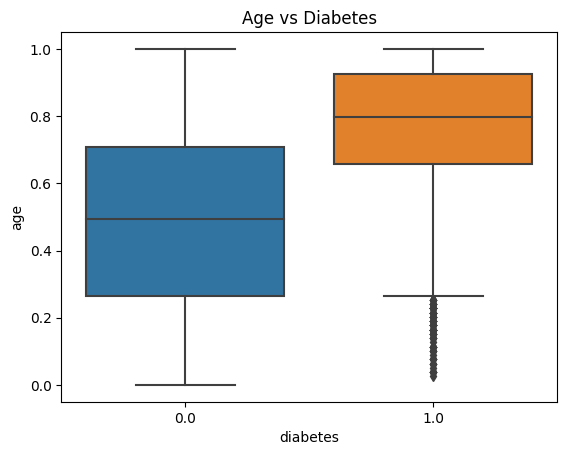

In [61]:
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes')
plt.show()

## diabete vs bmi

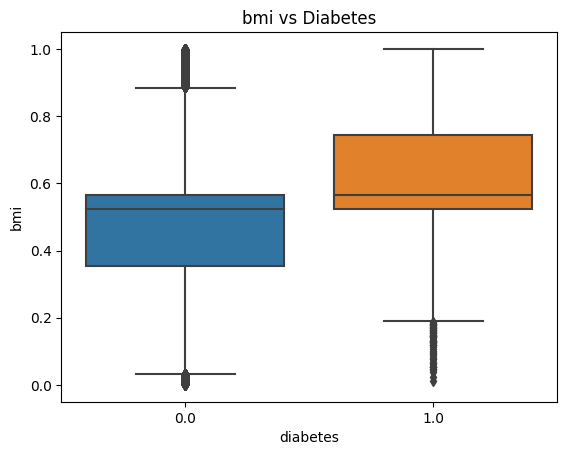

In [62]:
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('bmi vs Diabetes')
plt.show()

## daiabete vs HbA1c

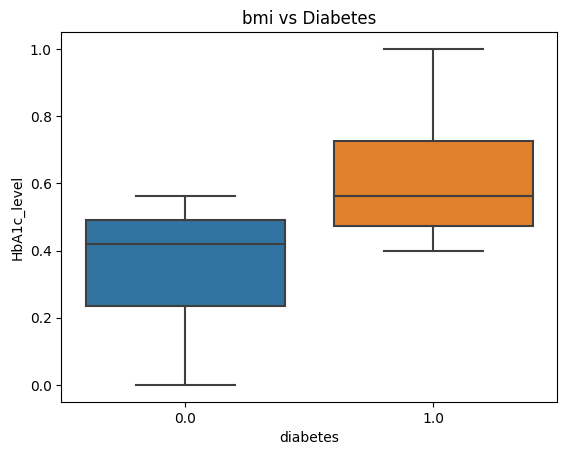

In [63]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('bmi vs Diabetes')
plt.show()

## diabete vs blood glucose

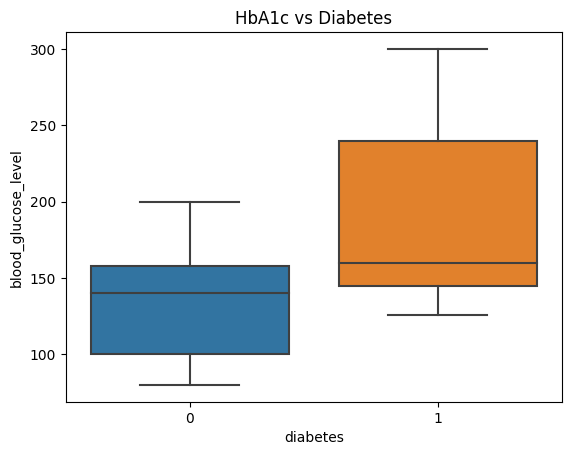

In [64]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data_diabete)
plt.title('HbA1c vs Diabetes')
plt.show()

## gender vs diabete

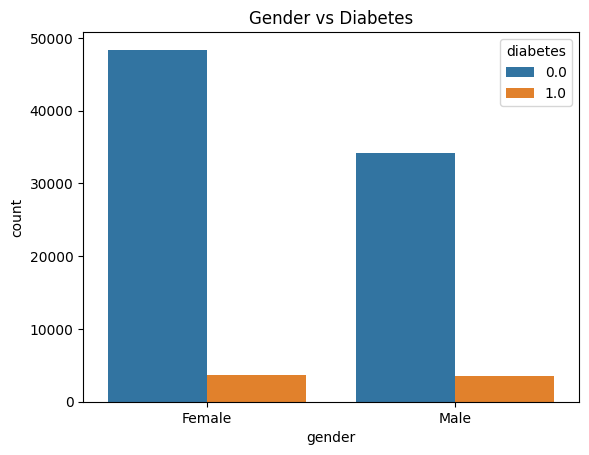

In [65]:
sns.countplot(x='gender', hue='diabetes', data=data)
plt.title('Gender vs Diabetes')
plt.show()

## diabete vs numerical var

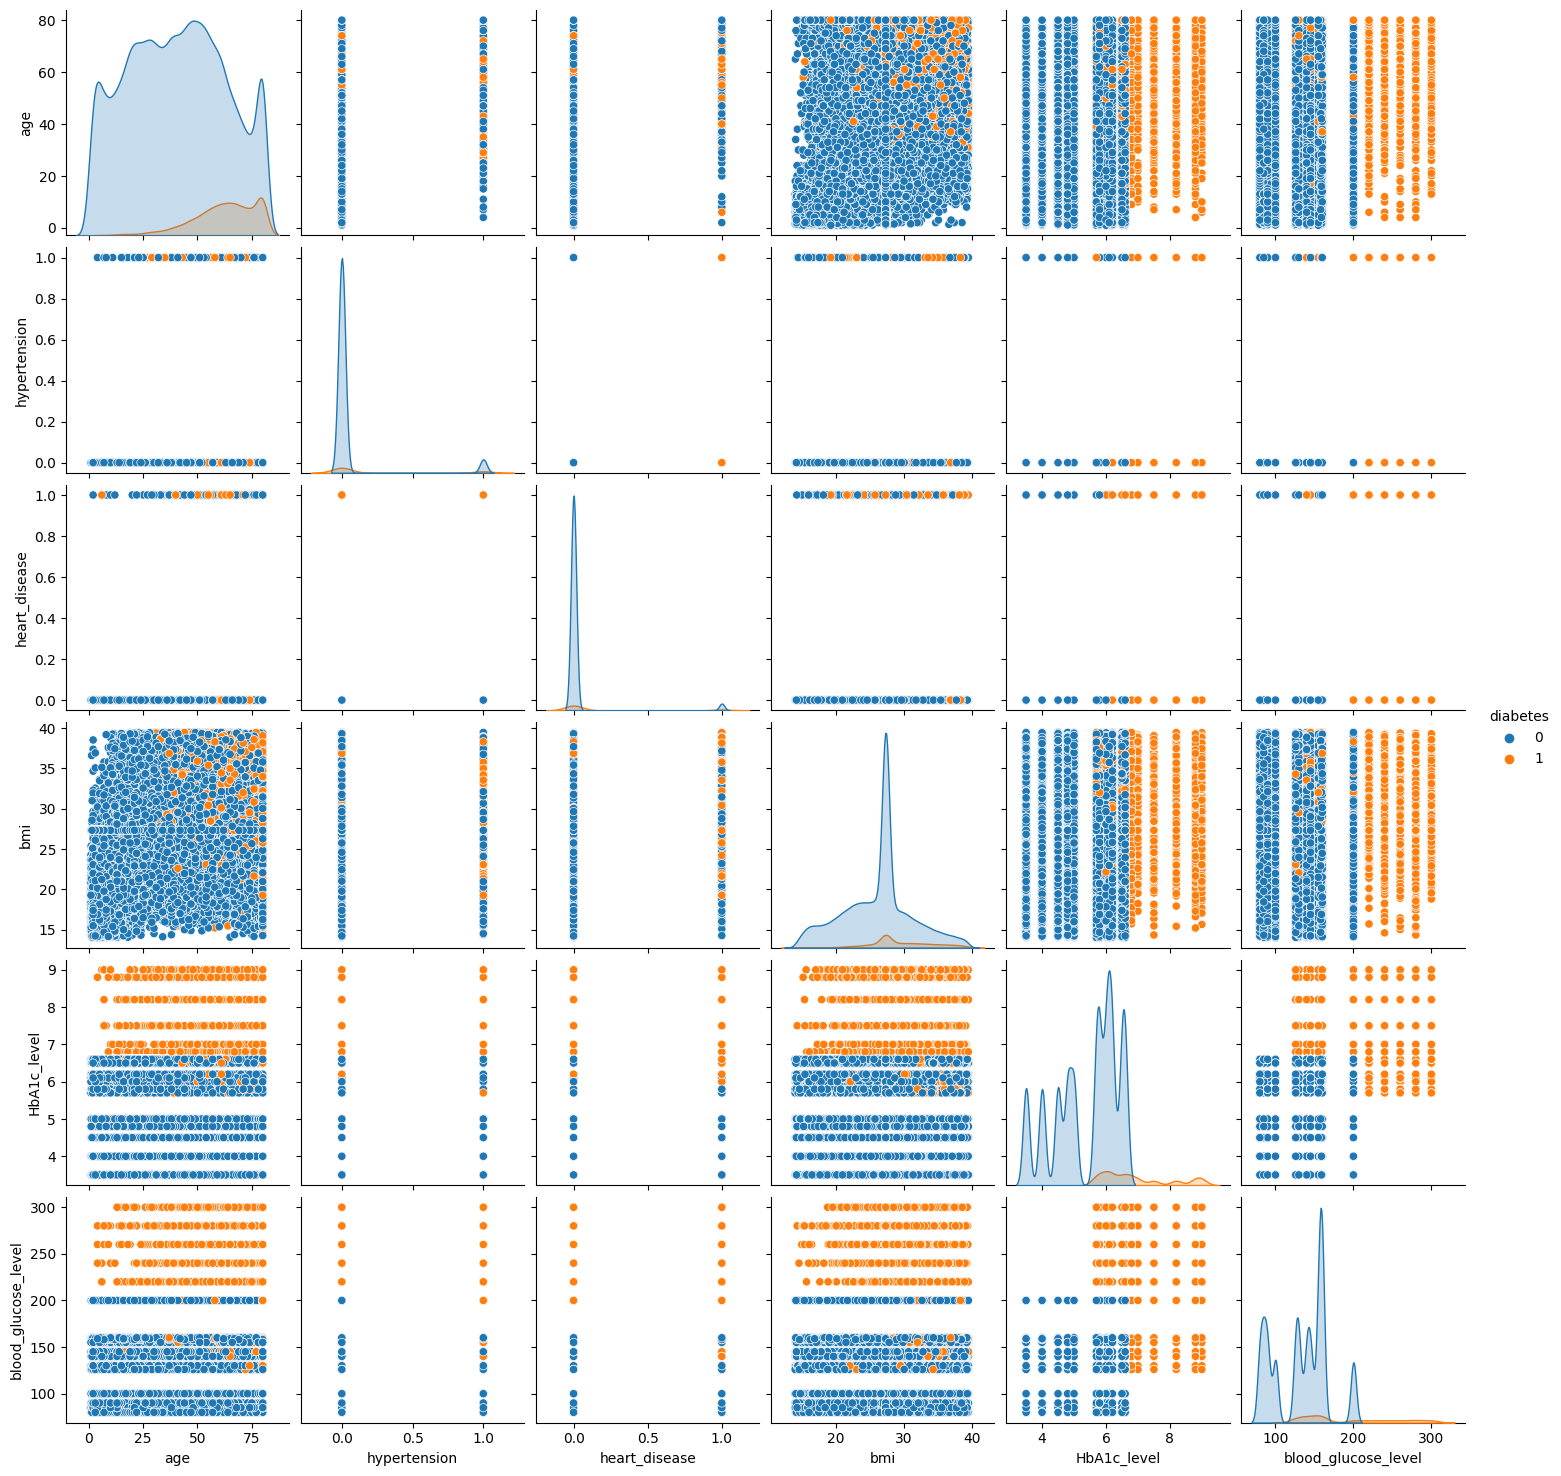

In [66]:
sns.pairplot(data_diabete, hue='diabetes')
plt.show()

In [67]:
catego_var = data['gender']
cat_dummies = pd.get_dummies(catego_var, drop_first=True)
cat_dummies.head()

,Male
0,False
1,False
2,True
3,False
4,True


In [68]:
catego_var = data[[ 'smoker']]
catego_dummies = pd.get_dummies(catego_var, drop_first=False)
catego_dummies.head()

,smoker_current,smoker_ever,smoker_former,smoker_never,smoker_not current
0,False,False,False,True,False
1,True,False,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,True,False,False,False,False


In [69]:
mydt = pd.concat([data, cat_dummies, catego_dummies ],axis=1)

In [70]:
mydt.drop(['gender', 'smoker'], axis=1,inplace=True)
mydt.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,smoker_current,smoker_ever,smoker_former,smoker_never,smoker_not current
0,1.000000,0.0,1.0,0.438948,0.563636,0.272727,0.0,False,False,False,False,True,False
1,0.670886,0.0,0.0,0.522576,0.563636,0.000000,0.0,False,True,False,False,False,False
2,0.341772,0.0,0.0,0.522576,0.400000,0.354545,0.0,True,False,False,False,True,False
3,0.443038,0.0,0.0,0.370632,0.272727,0.340909,0.0,False,True,False,False,False,False
4,0.949367,1.0,1.0,0.240675,0.236364,0.340909,0.0,True,True,False,False,False,False


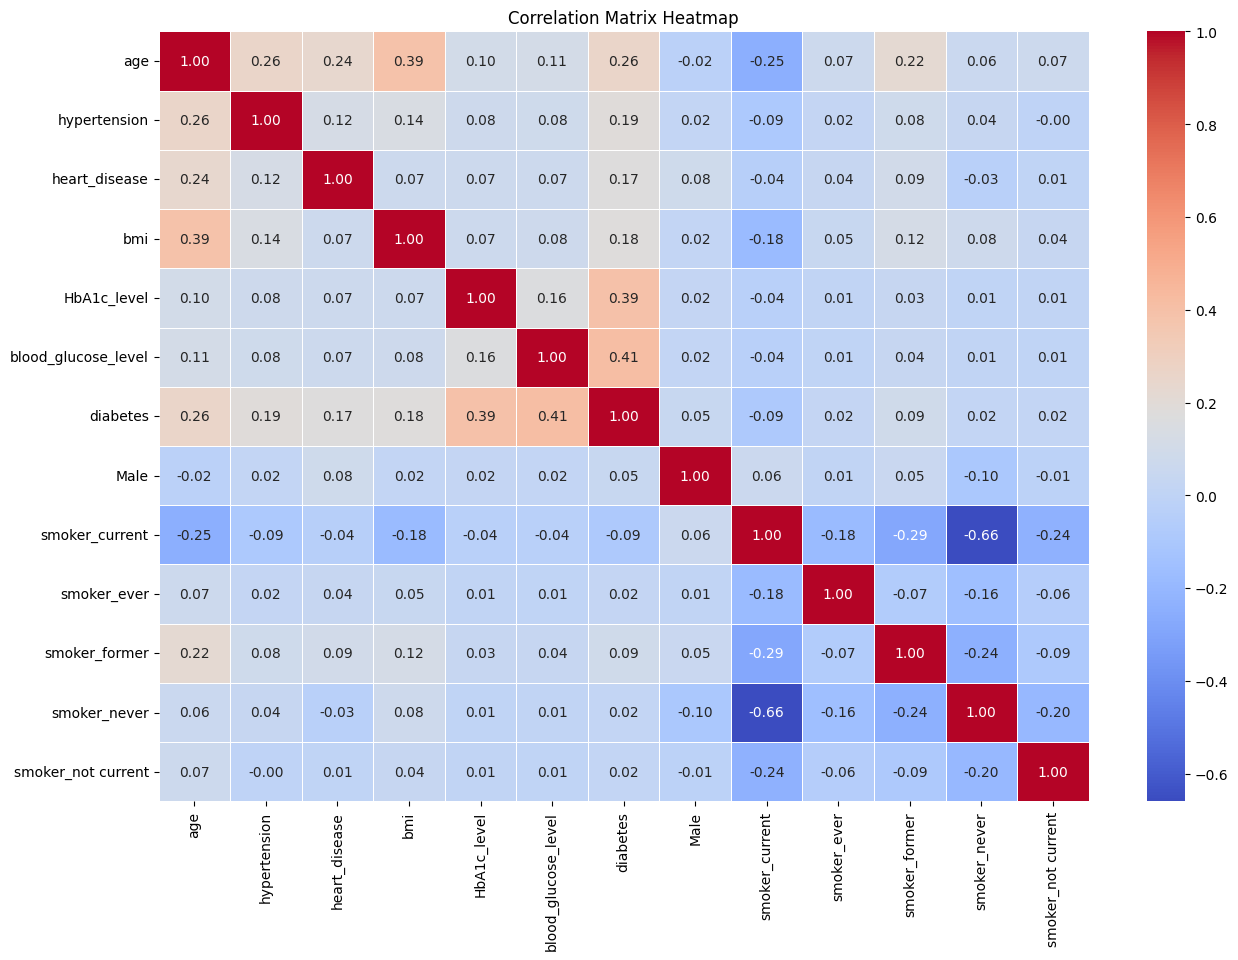

In [71]:
# Compute the correlation matrix
correlation_matrix = mydt.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


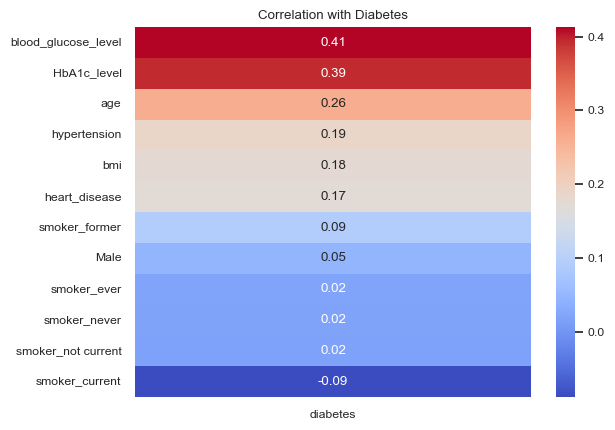

In [72]:
# Create a heatmap of the correlations with the target column
corr = mydt.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [73]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoker,gender
0,1.000000,0.0,1.0,0.438948,0.563636,0.272727,0.0,never,Female
1,0.670886,0.0,0.0,0.522576,0.563636,0.000000,0.0,current,Female
2,0.341772,0.0,0.0,0.522576,0.400000,0.354545,0.0,never,Male
3,0.443038,0.0,0.0,0.370632,0.272727,0.340909,0.0,current,Female
4,0.949367,1.0,1.0,0.240675,0.236364,0.340909,0.0,current,Male


In [74]:
data['smoker'].value_counts()

smoker
current        39367
never          32150
former          8578
not current     5970
ever            3723
Name: count, dtype: int64

In [75]:
data['smoker'].replace('current', 'smoker',inplace=True)
data['smoker'].replace('former', 'smoker',inplace=True)
data['smoker'].replace('not current', 'smoker',inplace=True)
data['smoker'].replace('ever', 'smoker',inplace=True)
data['smoker'].replace('never', 'not smoker',inplace=True)


In [76]:
data['smoker'].value_counts()

smoker
smoker        57638
not smoker    32150
Name: count, dtype: int64

In [77]:
catego_var = data[['gender', 'smoker']]
cat_dummies = pd.get_dummies(catego_var, drop_first=True)
cat_dummies.head()

,gender_Male,smoker_smoker
0,False,False
1,False,True
2,True,False
3,False,True
4,True,True


In [78]:
data1 = data.drop(['gender', 'smoker'], axis=1)

In [79]:
data1 = pd.concat([data1, cat_dummies],axis=1)

In [80]:
data1

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoker_smoker
0,1.000000,0.0,1.0,0.438948,0.563636,0.272727,0.0,False,False
1,0.670886,0.0,0.0,0.522576,0.563636,0.000000,0.0,False,True
2,0.341772,0.0,0.0,0.522576,0.400000,0.354545,0.0,True,False
3,0.443038,0.0,0.0,0.370632,0.272727,0.340909,0.0,False,True
4,0.949367,1.0,1.0,0.240675,0.236364,0.340909,0.0,True,True
...,...,...,...,...,...,...,...,...,...
89783,0.443038,0.0,0.0,0.415783,0.236364,0.295455,0.0,False,True
89784,0.012658,0.0,0.0,0.131920,0.545455,0.090909,0.0,False,True
89785,0.822785,0.0,0.0,0.542599,0.400000,0.340909,0.0,True,True
89786,0.291139,0.0,0.0,0.840597,0.090909,0.090909,0.0,False,False


## Prediction

In [81]:
#split data into training and testing data
Y = data1.diabetes
X = data1.drop('diabetes', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
#define the model
model = DecisionTreeClassifier()
#fit the model
model.fit(X_train, Y_train)
#Prediction
Y_pred = model.predict(X_test)
#evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.954337899543379


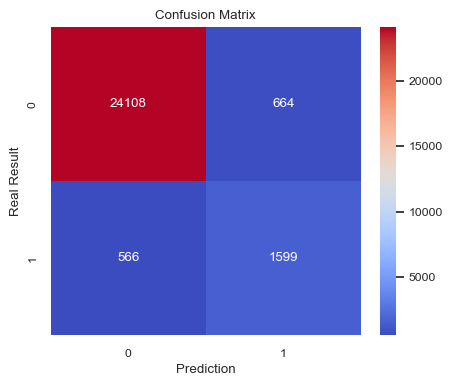

In [84]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Real Result')
plt.title('Confusion Matrix')
plt.show()